In [2]:
import torch

v = torch.rand([8])
v_th = 0.5
spike = (v >= v_th).to(v)
print('spike =', spike)

ModuleNotFoundError: No module named 'torch'

In [ ]:
!pip install spikingjelly
from spikingjelly.activation_based import neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.6/437.6 kB 8.5 MB/s eta 0:00:00


In [ ]:
net = neuron.IFNode(step_mode='m') # multi-step. shape=[T, N, *]
net.step_mode = 's' # single step. shape=[N, *]. 데이터를 한시점씩 처리

In [ ]:
net_s = neuron.IFNode(step_mode='s') # IF 뉴런 만들기
T = 4
N = 1
C = 3
H = 8
W = 8
x_seq = torch.rand([T,N,C,H,W])
y_seq = []
for t in range(T): # 0~3초까지 반복
  x = x_seq[t]
  y = net_s(x)
  y_seq.append(y.unsqueeze(0))

y_seq = torch.cat(y_seq)

In [ ]:
print(x)
print(y_seq)

tensor(0.4557)
tensor([[[[[0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0., 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
net_m = neuron.IFNode(step_mode ='m')
T = 4
N = 1
C = 3
H = 8
W = 8
x_seq = torch.rand([T, N, C, H, W])
y_seq = net_m(x_seq)

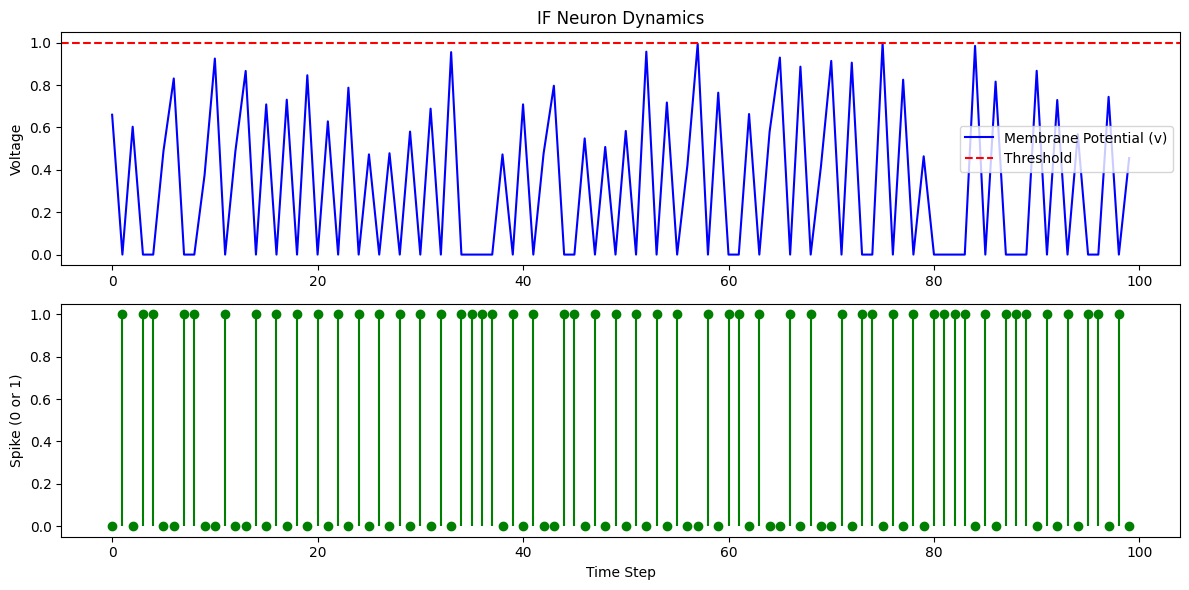

In [ ]:
T = 100
net_s = neuron.IFNode(step_mode='s')

# 랜덤 입력 생성 (어느 정도 강도가 있어야 전위가 쌓이므로 0.3을 더함)
x_seq = torch.rand([T]) + 0.3

v_history = [] # 막전위 기록용
s_history = [] # 스파이크 기록용

# 2. 시뮬레이션 진행
for t in range(T):
    x = x_seq[t].unsqueeze(0) # 입력을 [1] 형태로 맞춤
    y = net_s(x)

    v_history.append(net_s.v.item())
    s_history.append(y.item())

# 3. 그래프 그리기
plt.figure(figsize=(12, 6))

# 막전위(Membrane Potential) 그래프
plt.subplot(2, 1, 1)
plt.plot(v_history, label='Membrane Potential (v)', color='blue')
plt.axhline(y=1.0, color='red', linestyle='--', label='Threshold') # 기본 임계치는 1.0
plt.title('IF Neuron Dynamics')
plt.ylabel('Voltage')
plt.legend()

# 출력 스파이크(Output Spikes) 그래프
plt.subplot(2, 1, 2)
plt.stem(s_history, linefmt='g-', markerfmt='go', basefmt=' ')
plt.ylabel('Spike (0 or 1)')
plt.xlabel('Time Step')
plt.tight_layout()
plt.show()

In [ ]:
net_s = neuron.IFNode(step_mode ='s')
x = torch.rand([4])
print(net_s)
print(f'the initial v={net_s.v}')
y = net_s(x)
print(f'x={x}')
print(f'y={y}')
print(f'v={net_s.v}')

IFNode(
  v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=s, backend=torch
  (surrogate_function): Sigmoid(alpha=4.0, spiking=True)
)
the initial v=0.0
x=tensor([0.5126, 0.3829, 0.6028, 0.1885])
y=tensor([0., 0., 0., 0.])
v=tensor([0.5126, 0.3829, 0.6028, 0.1885])


In [ ]:
net_s = neuron.IFNode(step_mode='s')
x = torch.rand([4])
print(f'check point 0: v={net_s.v}')
y = net_s(x)
print(f'check point 1: v={net_s.v}')
net_s.reset()
print(f'check point 2: v={net_s.v}')
x = torch.rand([8])
y = net_s(x)
print(f'check point 3: v={net_s.v}')

check point 0: v=0.0
check point 1: v=tensor([0.0833, 0.6930, 0.8955, 0.1232])
check point 2: v=0.0
check point 3: v=tensor([0.3524, 0.4002, 0.7002, 0.5194, 0.3615, 0.4670, 0.6901, 0.2086])


In [ ]:
from tqdm import tqdm
for x, label in tqdm(train_data_loader):
    # ...
    optimizer.zero_grad()
    y = net(x)
    loss = criterion(y, label)
    loss.backward()
    optimizer.step()

    functional.reset_net(net)

NameError: name 'train_data_loader' is not defined

In [ ]:
net_s = neuron.IFNode(step_mode='s') # IF 뉴런 만들기
T = 4
N = 1
C = 3
H = 8
W = 8
y_seq_step_by_step = []

for i in range(T):
  x = x_seq[t]
  y = net(x)
  y_seq_step_by_step.append(y.unsqueeze(0))

y_seq_step_by_step = torch.cat(y_seq_step_by_step)
print(x)
print(y_seq_step_by_step)

tensor(0.4557)
tensor([1., 0., 0., 1.])


In [ ]:
import torch.nn as nn
from spikingjelly.activation_based import layer, functional

In [ ]:
T = 4
N = 2
C = 8
x_seq = torch.rand([T,N,C])*64

net = nn.Sequential(
    layer.Linear(C,4),
    neuron.IFNode(),
    layer.Linear(4,2),
    neuron.IFNode(),
)

functional.set_step_mode(net, step_mode='m')
with torch.no_grad():
  y_seq_layer_by_layer = net(x_seq)

In [ ]:
T = 4
N = 2
C = 3
H = 8
W = 8
x_seq = torch.rand([T, N, C, H, W]) * 64.

net = nn.Sequential(
layer.Conv2d(3, 8, kernel_size=3, padding=1, stride=1, bias=False),
neuron.IFNode(),
layer.MaxPool2d(2, 2),
neuron.IFNode(),
layer.Flatten(start_dim=1),
layer.Linear(8 * H // 2 * W // 2, 10),
neuron.IFNode(),
)

print(f'net={net}')

with torch.no_grad():
    y_seq_step_by_step = []
    for t in range(T):
        x = x_seq[t]
        y = net(x)
        y_seq_step_by_step.append(y.unsqueeze(0))

    y_seq_step_by_step = torch.cat(y_seq_step_by_step, 0)
    # we can also use `y_seq_step_by_step = functional.multi_step_forward(x_seq, net)` to get the same results

    print(f'y_seq_step_by_step=\n{y_seq_step_by_step}')

    functional.reset_net(net)
    functional.set_step_mode(net, step_mode='m')
    y_seq_layer_by_layer = net(x_seq)

    max_error = (y_seq_layer_by_layer - y_seq_step_by_step).abs().max()
    print(f'max_error={max_error}')

net=Sequential(
  (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False, step_mode=s)
  (1): IFNode(
    v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=s, backend=torch
    (surrogate_function): Sigmoid(alpha=4.0, spiking=True)
  )
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False, step_mode=s)
  (3): IFNode(
    v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=s, backend=torch
    (surrogate_function): Sigmoid(alpha=4.0, spiking=True)
  )
  (4): Flatten(start_dim=1, end_dim=-1, step_mode=s)
  (5): Linear(in_features=128, out_features=10, bias=True)
  (6): IFNode(
    v_threshold=1.0, v_reset=0.0, detach_reset=False, step_mode=s, backend=torch
    (surrogate_function): Sigmoid(alpha=4.0, spiking=True)
  )
)
y_seq_step_by_step=
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 1., 0

### 2  

In [4]:
!pip install spikingjelly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.6/437.6 kB 8.1 MB/s eta 0:00:00


In [5]:
import torch
from spikingjelly.activation_based import neuron
from spikingjelly import visualizing
import matplotlib.pyplot as plt

In [6]:
if_layer = neuron.IFNode()

In [7]:
print(if_layer.v)

0.0


In [8]:
x = torch.rand(size=[2,3])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')

x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])


In [10]:
if_layer.reset()
print(x.shape, if_layer.v)

torch.Size([2, 3]) 0.0


In [11]:
def neuronal_charge(self, x:torch.Tensor):
    self.v = self.v + x
    # V[t] = V[t-1] + X[t]

def neuronal_fire(self):
    self.spike = self.surrogate_function(self.v - self.v_threshold)
    # surrograte_function : 계단 함수={1 x>=0, 0  x<0}

In [12]:
def neuronal_reset(self):
  if self.v_reset is None: # soft reset
    self.v = self.v - self.spike*self.v_threshold
  else: # hard reset
    self.v = (1.-self.spike)*self.v + self.spike*self.v_reset

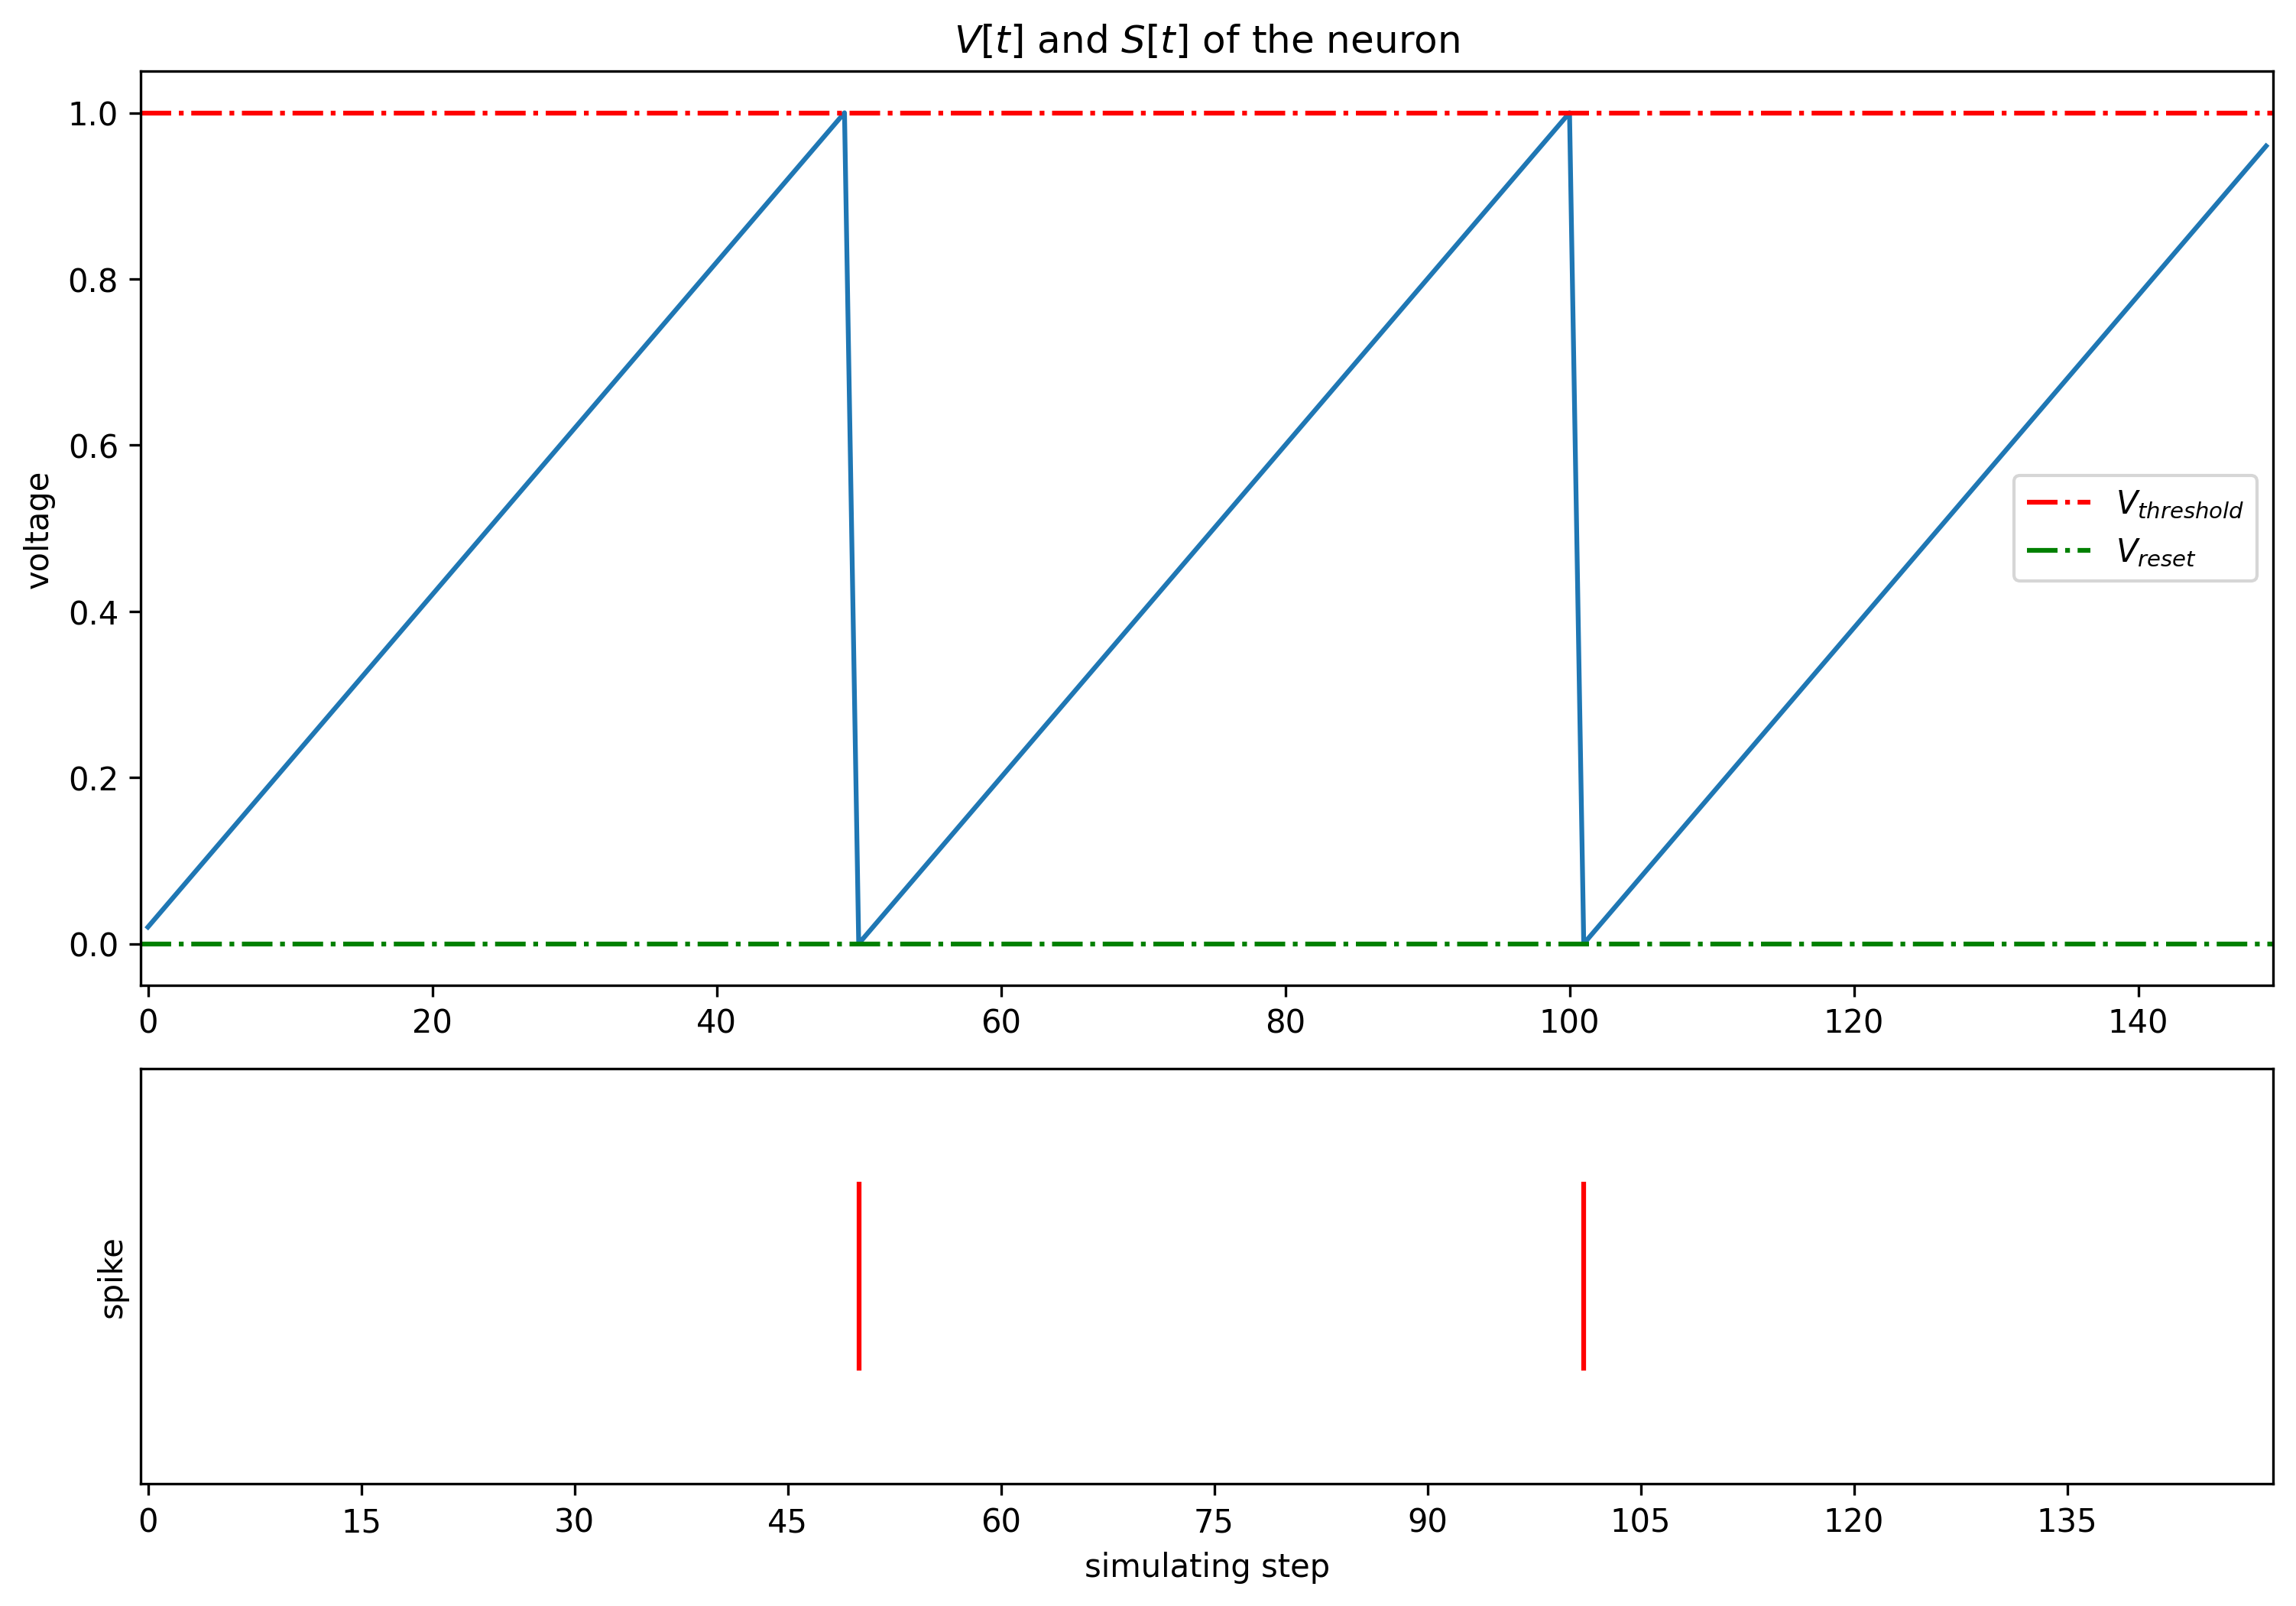

In [13]:
# if_layer = neuron.IFNode(v_threshold, v_reset) 설정하면 기본값과 달라짐. 기본값 : threshold=1.0, reset=0
if_layer.reset()
x = torch.as_tensor([0.02]) # 입력값=0.02
T = 150 # time step
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x)) # spike 기록
    v_list.append(if_layer.v) # 막전위 기록

dpi = 300
figsize = (12, 8)
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

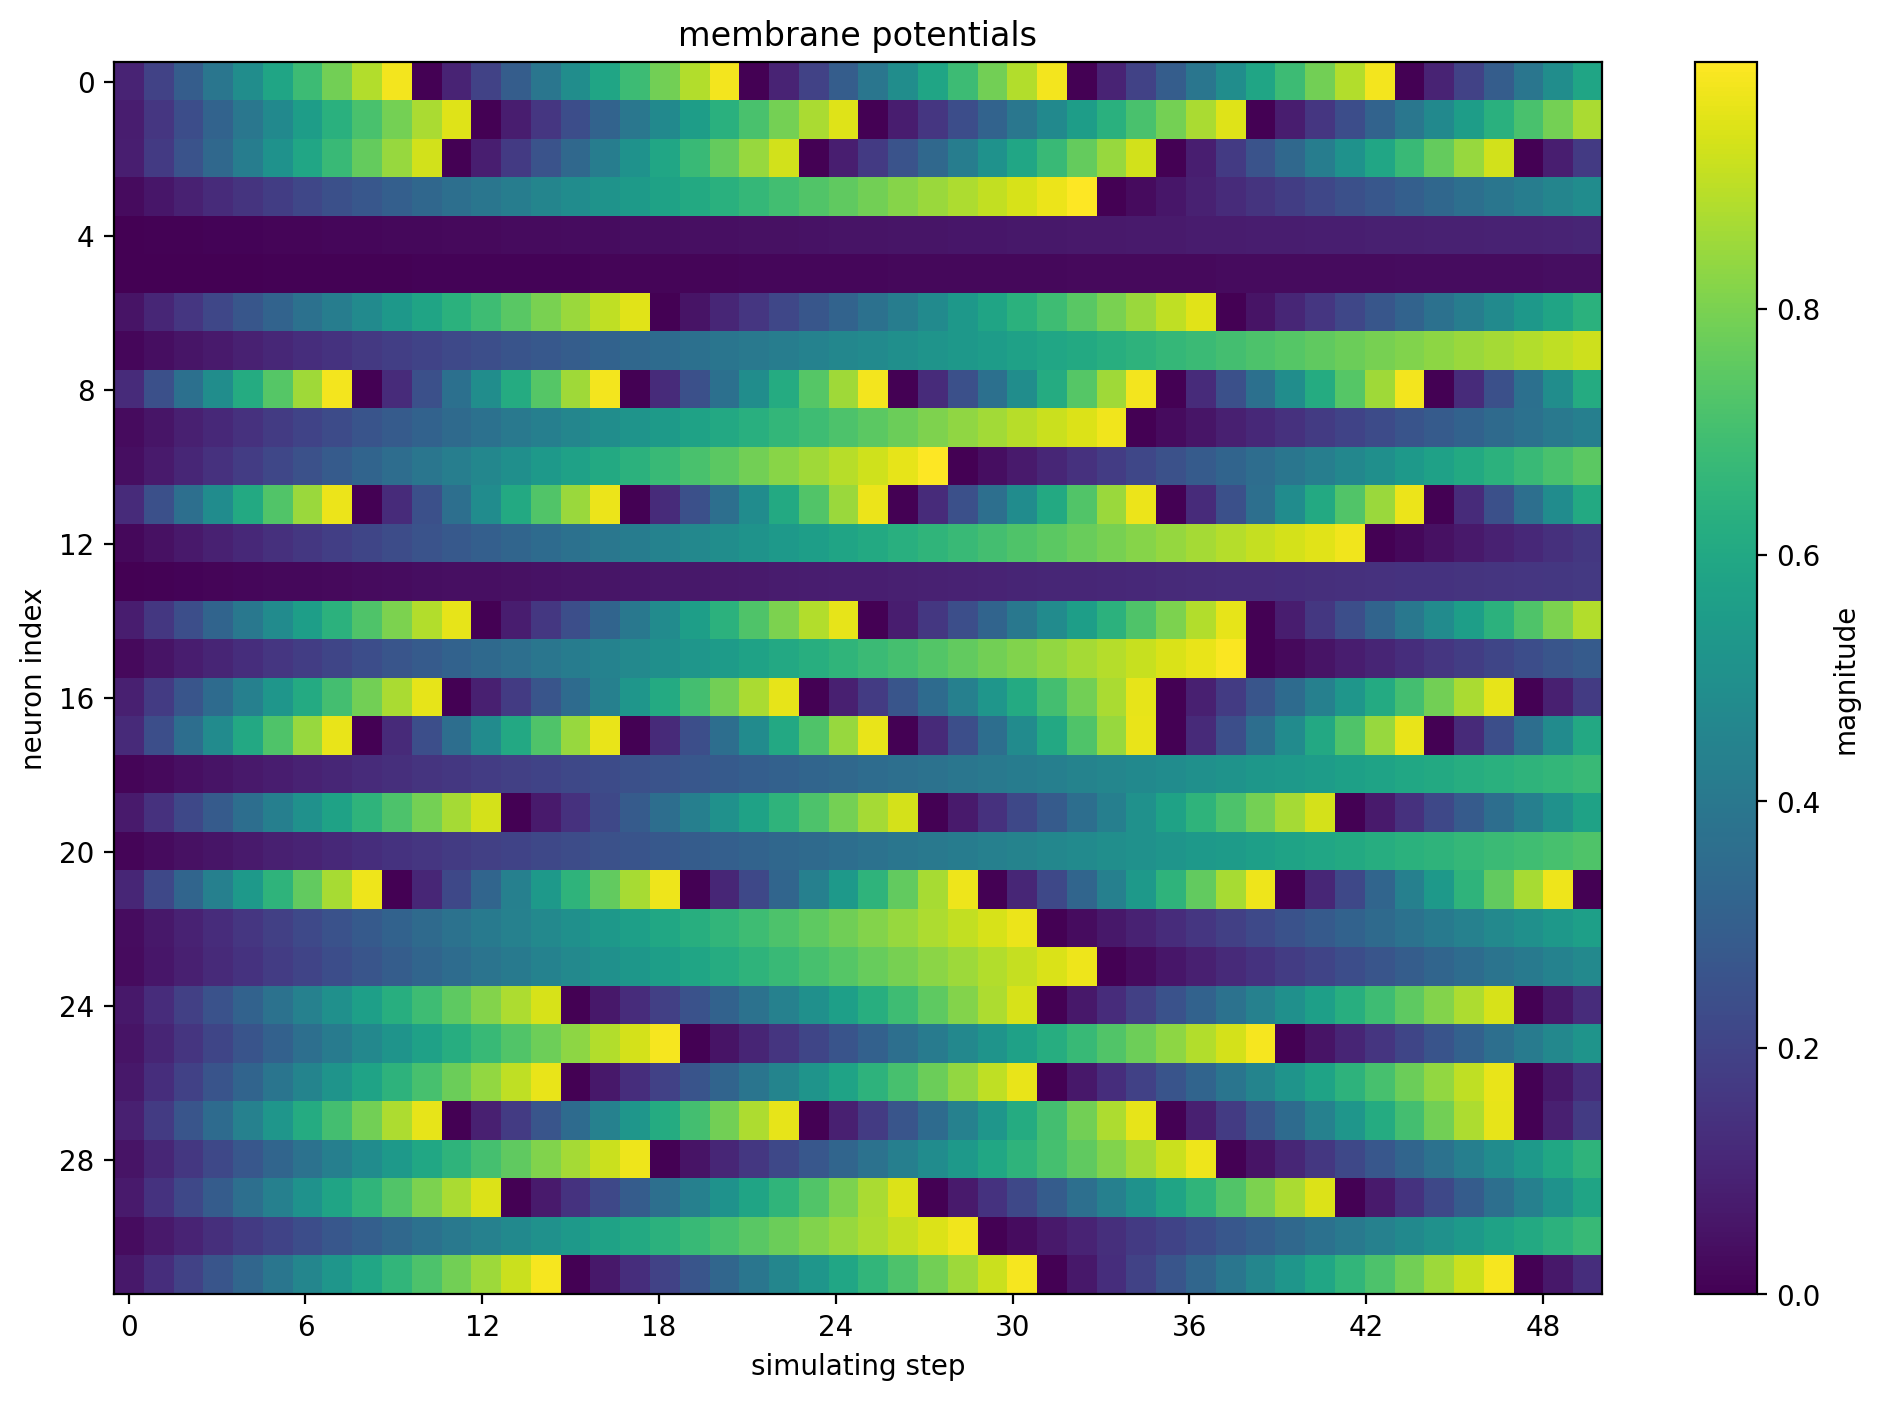

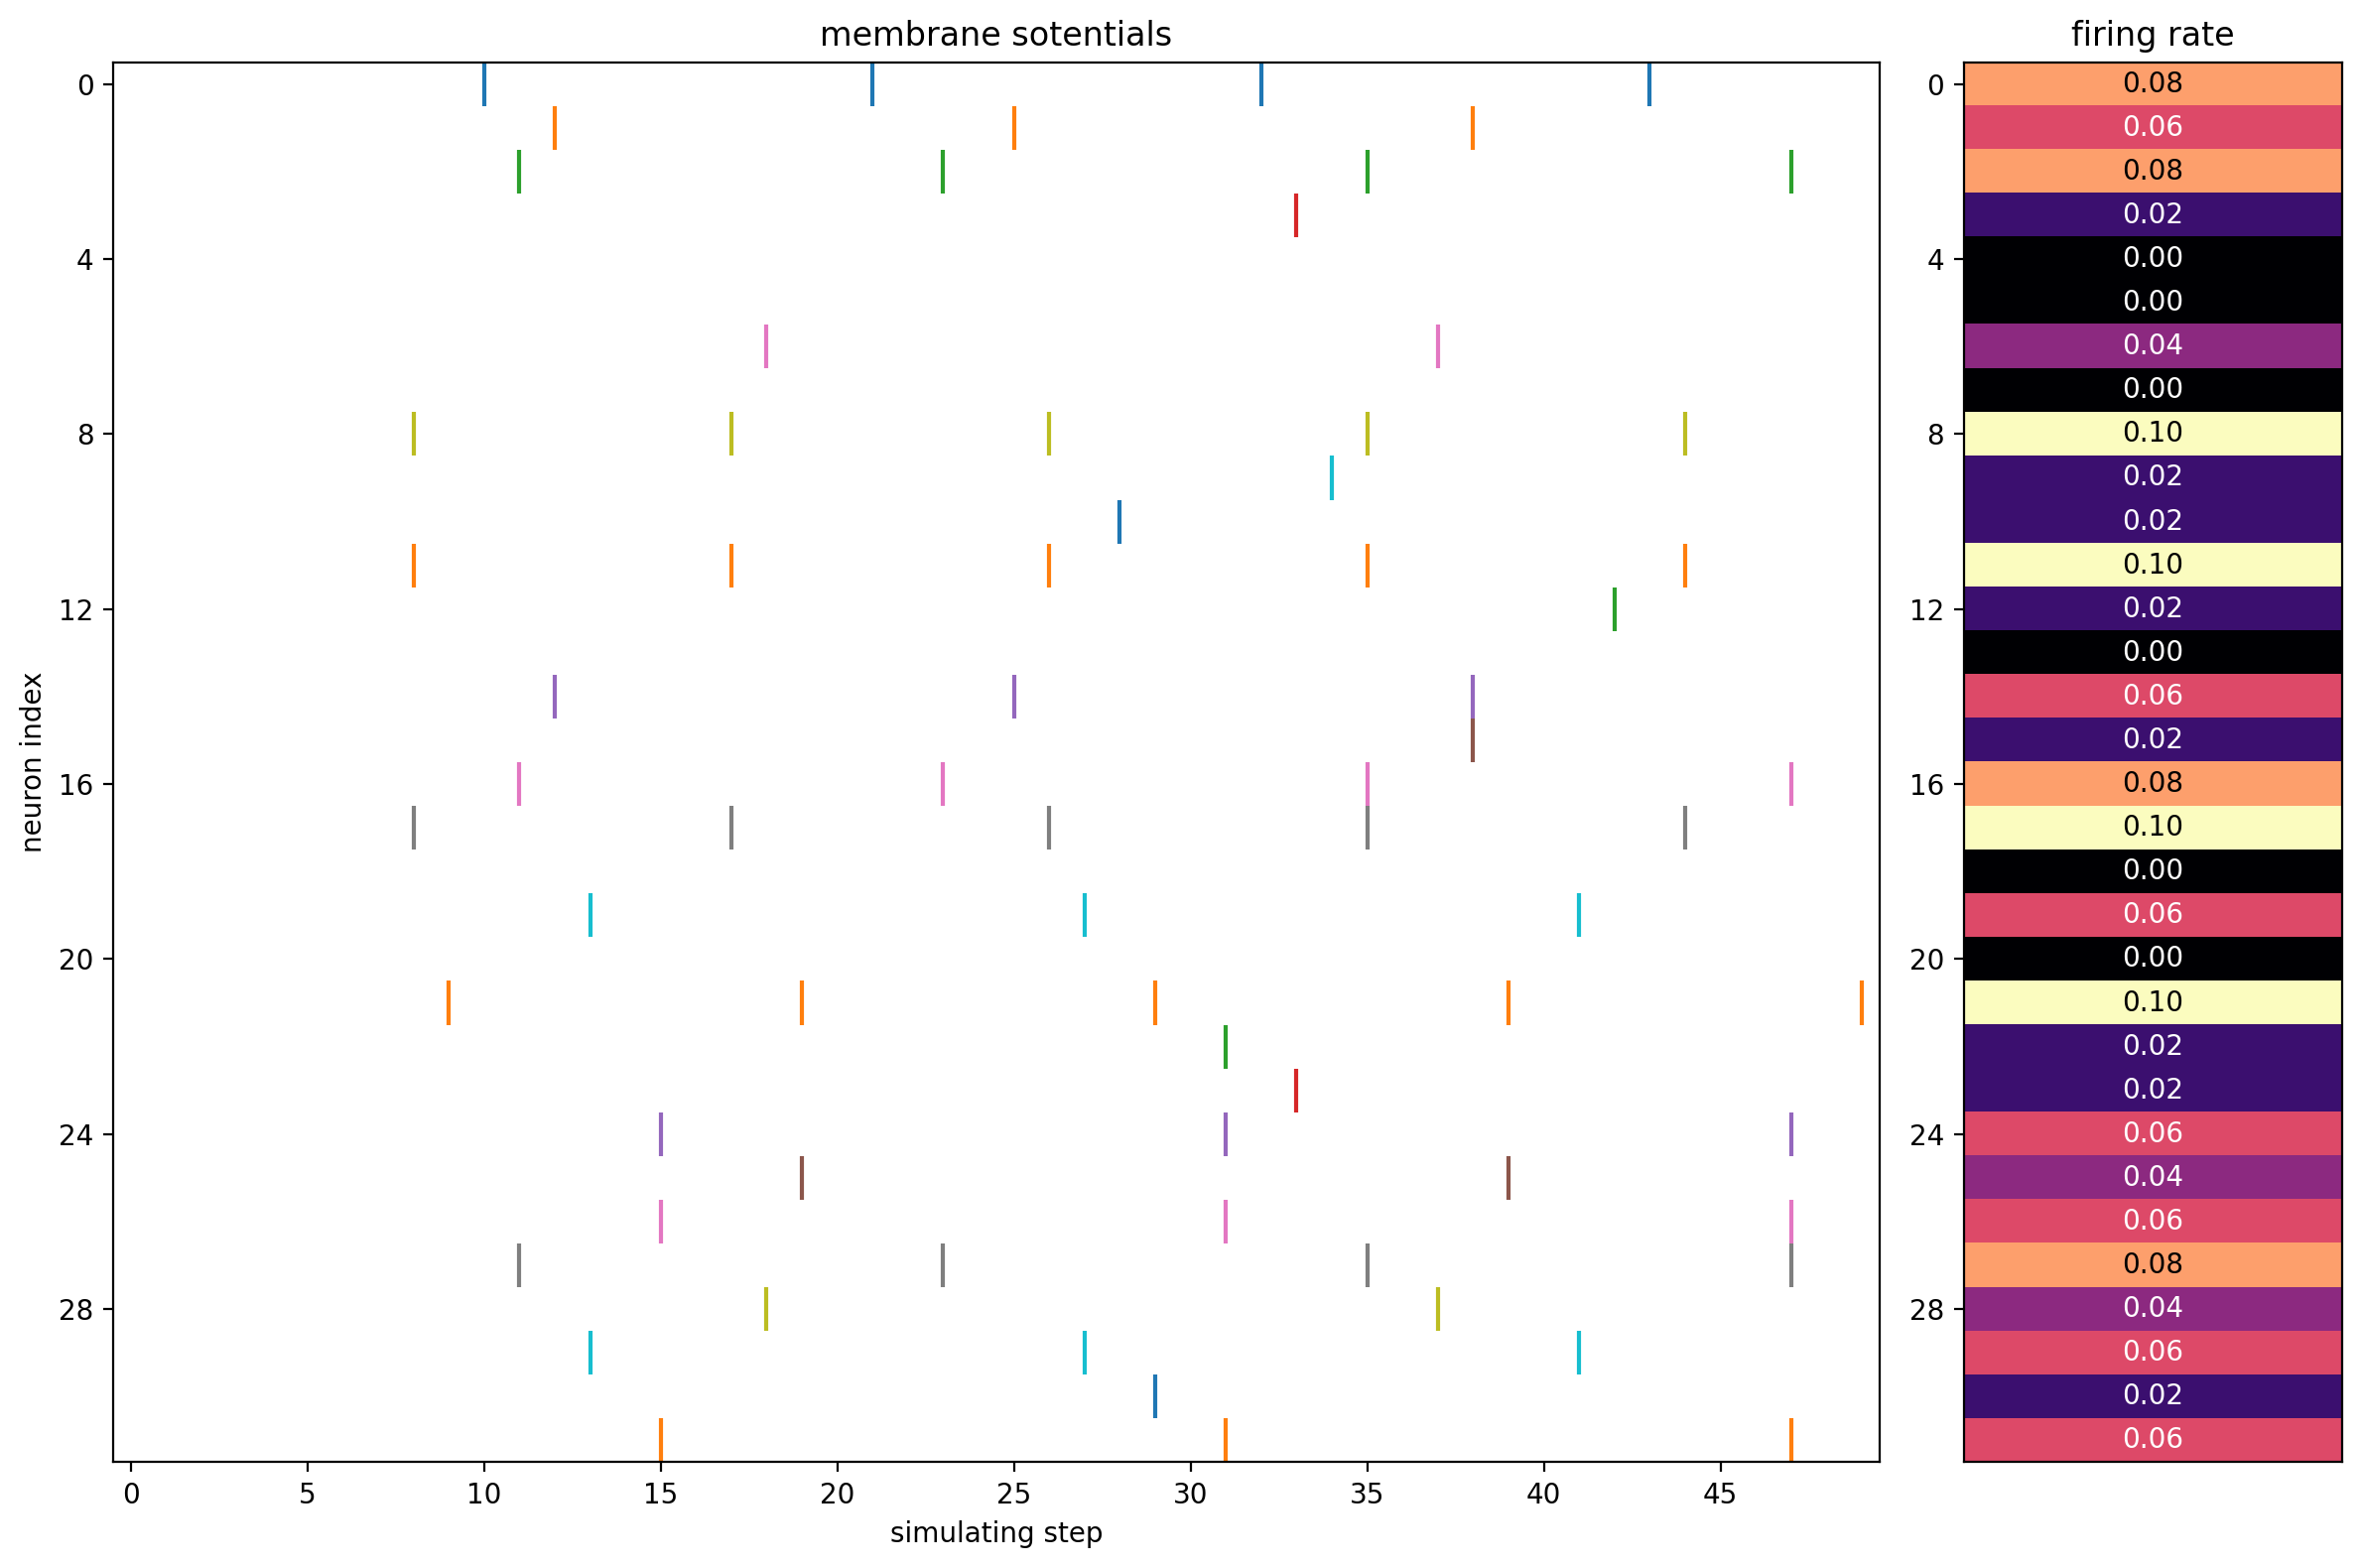

In [14]:
if_layer.reset()
T = 50
x = torch.rand([32]) / 8. # [32]
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x).unsqueeze(0)) # [1,32]
    v_list.append(if_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 200 # 해상도
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


# raster plot: 각 뉴런 인덱스가 언제 fire 되는지
visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane sotentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

In [15]:
from spikingjelly.activation_based import neuron, functional

if_layer.reset
if_layer = neuron.IFNode(step_mode='s')
T = 8
N = 2
x_seq = torch.rand([T,N])
y_seq = functional.multi_step_forward(x_seq, if_layer)
if_layer.reset()

if_layer.step_mode = 'm'
y_seq = if_layer(x_seq)
if_layer.reset()

In [16]:
print(f'if_layer.backend={if_layer.backend}') # 사용하고 있는 계산 엔진
print(f'step_mode={if_layer.step_mode}, supported_backends={if_layer.supported_backends}') # 사용할 수 있는 엔진 리스트

if_layer.backend=torch
step_mode=m, supported_backends=('torch', 'cupy')


In [17]:
if_layer.step_mode = 'm'
print(f'step_mode={if_layer.step_mode}, supported_backends={if_layer.supported_backends}')

step_mode=m, supported_backends=('torch', 'cupy')


In [27]:
print(nvidia-smi)

NameError: name 'nvidia' is not defined

In [21]:
!pip install cupy-cuda11x

In [23]:
from spikingjelly.activation_based import cupy
device = 'cuda:0'
if_layer.to(device)
if_layer.backend = 'cupy'
print(f'if_layer.backend={if_layer.backend}')

ModuleNotFoundError: No module named 'spikingjelly.activation'

In [27]:
from numpy import single

# single step일때 메커니즘
def single_step_forward(self, x:torch.Tensor):
  self.neuronal_charge(x)
  spike = self.neuronal_fire() # Removed 'x' as an argument
  self.neuronal_reset(spike)
  return spike

y = single_step_forward(if_layer, torch.as_tensor([2.]))
print(y)
z = single_step_forward(if_layer, torch.as_tensor([0.]))
print(z)

tensor([1.])
tensor([0.])


In [30]:
class SquareIFNode(neuron.BaseNode):
  def neuronal_charge(self, x: torch.Tensor):
    self.v = self.v + x**2 # V[t]=V[t-1]+X[t]**2

sif_layer = SquareIFNode()

T = 4
N = 1
x_seq = torch.rand([T,N])
print(f'x_seq={x_seq}')

for t in range(T): # single step
  yt = sif_layer(x_seq[t])
  print(f'sif_layer.v[{t}]={sif_layer.v}')

sif_layer.reset()
sif_layer.step_mode ='m'
y_seq = sif_layer(x_seq) # multi step
print(f'y_seq={y_seq}')
print(sif_layer.v) # single step의 마지막 결과와 똑같다
sif_layer.reset()

x_seq=tensor([[0.5367],
        [0.9023],
        [0.0488],
        [0.5923]])
sif_layer.v[0]=tensor([0.2881])
sif_layer.v[1]=tensor([0.])
sif_layer.v[2]=tensor([0.0024])
sif_layer.v[3]=tensor([0.3531])
y_seq=tensor([[0.],
        [1.],
        [0.],
        [0.]])
tensor([0.3531])


In [34]:
from spikingjelly import visualizing
import matplotlib.pyplot as plt

Time step 0: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 1: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 2: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 3: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 4: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 5: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 6: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 7: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 8: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 9: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 10: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 11: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 12: sif_layer.v.shape=torch.Size([]), s.shape=torch.Size([32])
Time step 13: sif_layer.v.shape=torch.Size([]), s.shape=torch

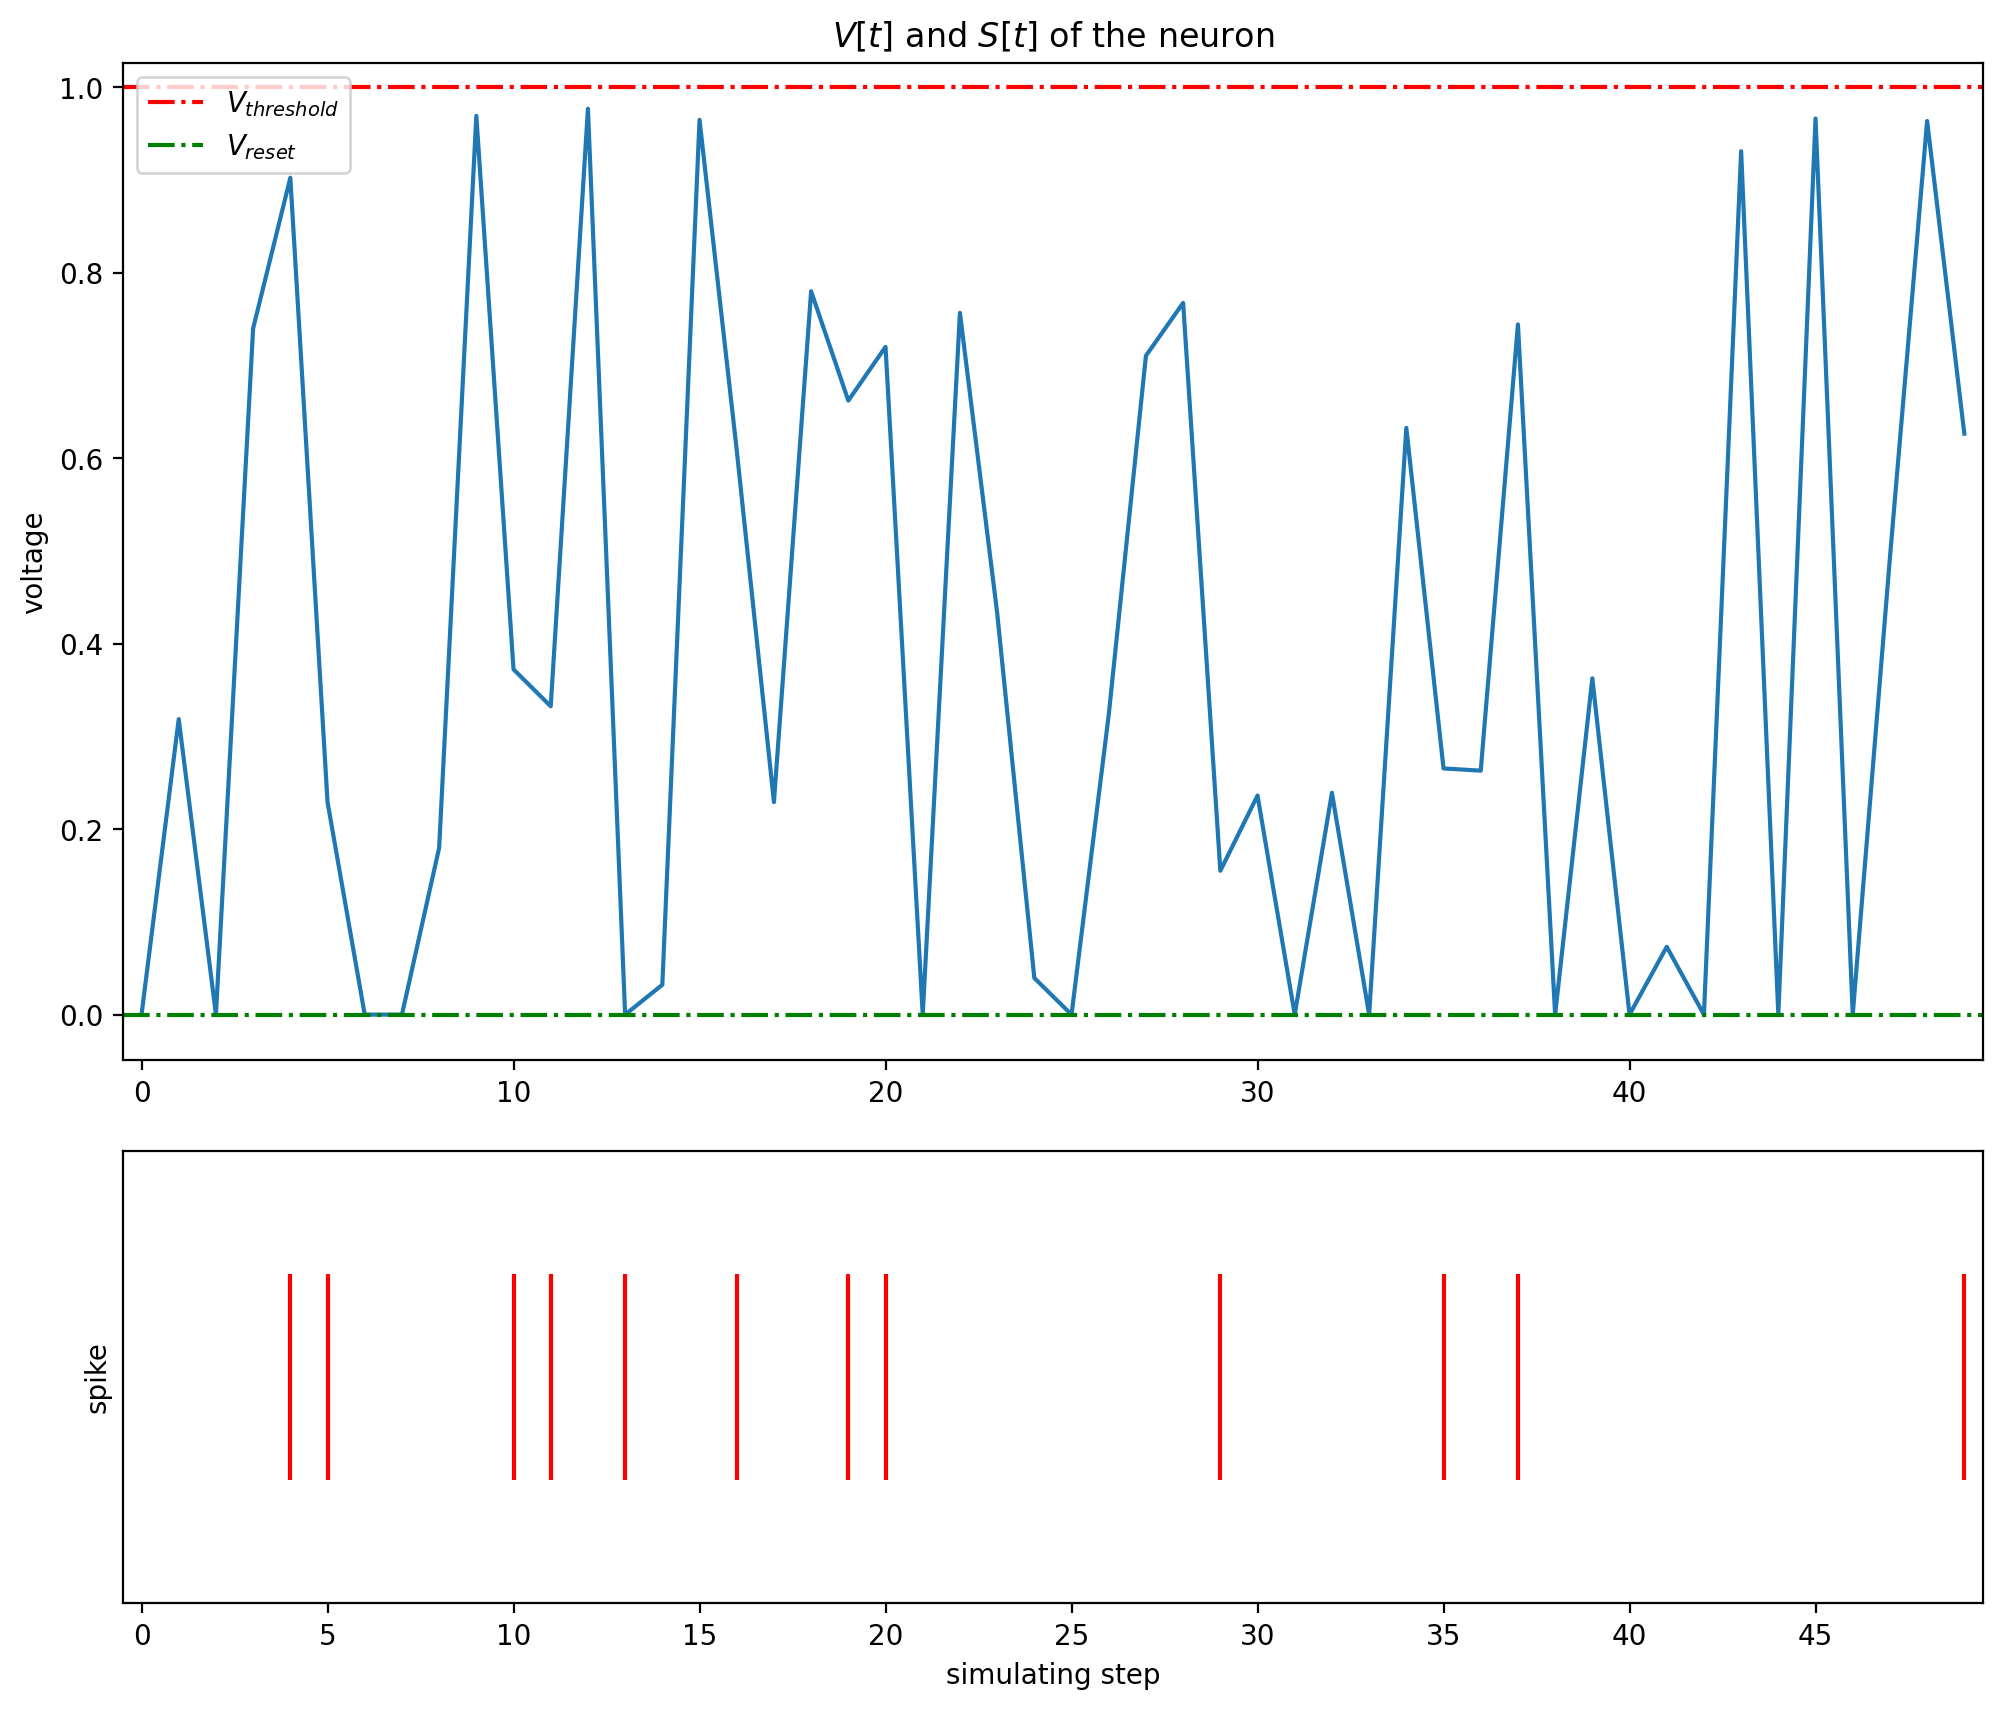

In [39]:
T = 50
N = 32
sif_layer.reset()

x_seq = torch.rand([T, N])
v_list = []
s_list = []

for t in range(T):
  s = sif_layer(x_seq[t])
  v_list.append(sif_layer.v.unsqueeze(0))
  s_list.append(s.squeeze(0))
  print(f"Time step {t}: sif_layer.v.shape={sif_layer.v.shape}, s.shape={s.shape}")

v_list = torch.cat(v_list) # Current Shape [T]
s_list = torch.cat(s_list) # Current Shape [T*N]

print(f"After concat: v_list.shape={v_list.shape}, s_list.shape={s_list.shape}")

figsize = (12,10)
dpi = 200

# Select the data for the first neuron (index 0)
# v_list is 1D [T], assuming it's the shared membrane potential or representative
# s_list needs to be reshaped to [T, N] to pick a single neuron's spikes
s_list_reshaped = s_list.reshape(T, N)
visualizing.plot_one_neuron_v_s(v_list.numpy(), s_list_reshaped[:, 0].numpy(), v_threshold=sif_layer.v_threshold,
                                v_reset=sif_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()